## Feature Selection - Information Gain 
### 1. Mutual Information in Regression PBL
* Estimates the mutual information for a continous target variable.
* It finds the relationship between the output feature and input feature.
* If the value is zero then they are independent of each other.
* If the value is high, then they both are dependent on each other.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing_data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Here for learning purpose we are only considering numerical features not the categorical coz they will be needed encoding


In [3]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
# select only numerical columns
numeric = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(df.select_dtypes(include = numeric).columns)

In [6]:
housing_df = df[numeric_cols]

In [7]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
housing_df.drop(['Id'], axis = 1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


### We always perform on training data and apply the tranformations on test data.
#### we do train test split to avoid overfitting.

In [9]:
X = housing_df.drop(['SalePrice'], axis = 1)
y = housing_df['SalePrice']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
X_train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

### Before performing this we have to treat missing values otherwise it will throw error.

In [18]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile
mir = mutual_info_regression(X_train.fillna(0), y_train)
mir

array([0.        , 0.25193142, 0.21141422, 0.16531497, 0.53421629,
       0.09140387, 0.3509942 , 0.25080061, 0.10160893, 0.15392451,
       0.        , 0.1127934 , 0.38569817, 0.30976701, 0.22796888,
       0.00321006, 0.48219643, 0.02144467, 0.        , 0.26178564,
       0.08107121, 0.03310949, 0.01928311, 0.18840629, 0.18360108,
       0.26701208, 0.38606811, 0.37110752, 0.07204432, 0.17406421,
       0.00784783, 0.01106407, 0.01584255, 0.        , 0.        ,
       0.        , 0.00562879])

In [13]:
mir = pd.Series(mir)
mir

0     0.000000
1     0.242439
2     0.214687
3     0.166418
4     0.525710
5     0.121559
6     0.348709
7     0.242428
8     0.103105
9     0.155230
10    0.005124
11    0.112463
12    0.383150
13    0.311586
14    0.235108
15    0.012201
16    0.483776
17    0.031766
18    0.000000
19    0.266297
20    0.090948
21    0.049722
22    0.021663
23    0.178664
24    0.181929
25    0.269936
26    0.356896
27    0.374247
28    0.074549
29    0.178737
30    0.008038
31    0.014620
32    0.027254
33    0.004324
34    0.000000
35    0.000000
36    0.002709
dtype: float64

In [14]:
mir.index = X_train.columns
mir.index

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [15]:
mir.sort_values(ascending = False)

OverallQual      0.525710
GrLivArea        0.483776
TotalBsmtSF      0.383150
GarageArea       0.374247
GarageCars       0.356896
YearBuilt        0.348709
1stFlrSF         0.311586
GarageYrBlt      0.269936
FullBath         0.266297
MSSubClass       0.242439
YearRemodAdd     0.242428
2ndFlrSF         0.235108
LotFrontage      0.214687
Fireplaces       0.181929
OpenPorchSF      0.178737
TotRmsAbvGrd     0.178664
LotArea          0.166418
BsmtFinSF1       0.155230
OverallCond      0.121559
BsmtUnfSF        0.112463
MasVnrArea       0.103105
HalfBath         0.090948
WoodDeckSF       0.074549
BedroomAbvGr     0.049722
BsmtFullBath     0.031766
ScreenPorch      0.027254
KitchenAbvGr     0.021663
3SsnPorch        0.014620
LowQualFinSF     0.012201
EnclosedPorch    0.008038
BsmtFinSF2       0.005124
PoolArea         0.004324
YrSold           0.002709
Id               0.000000
BsmtHalfBath     0.000000
MiscVal          0.000000
MoSold           0.000000
dtype: float64

<Axes: >

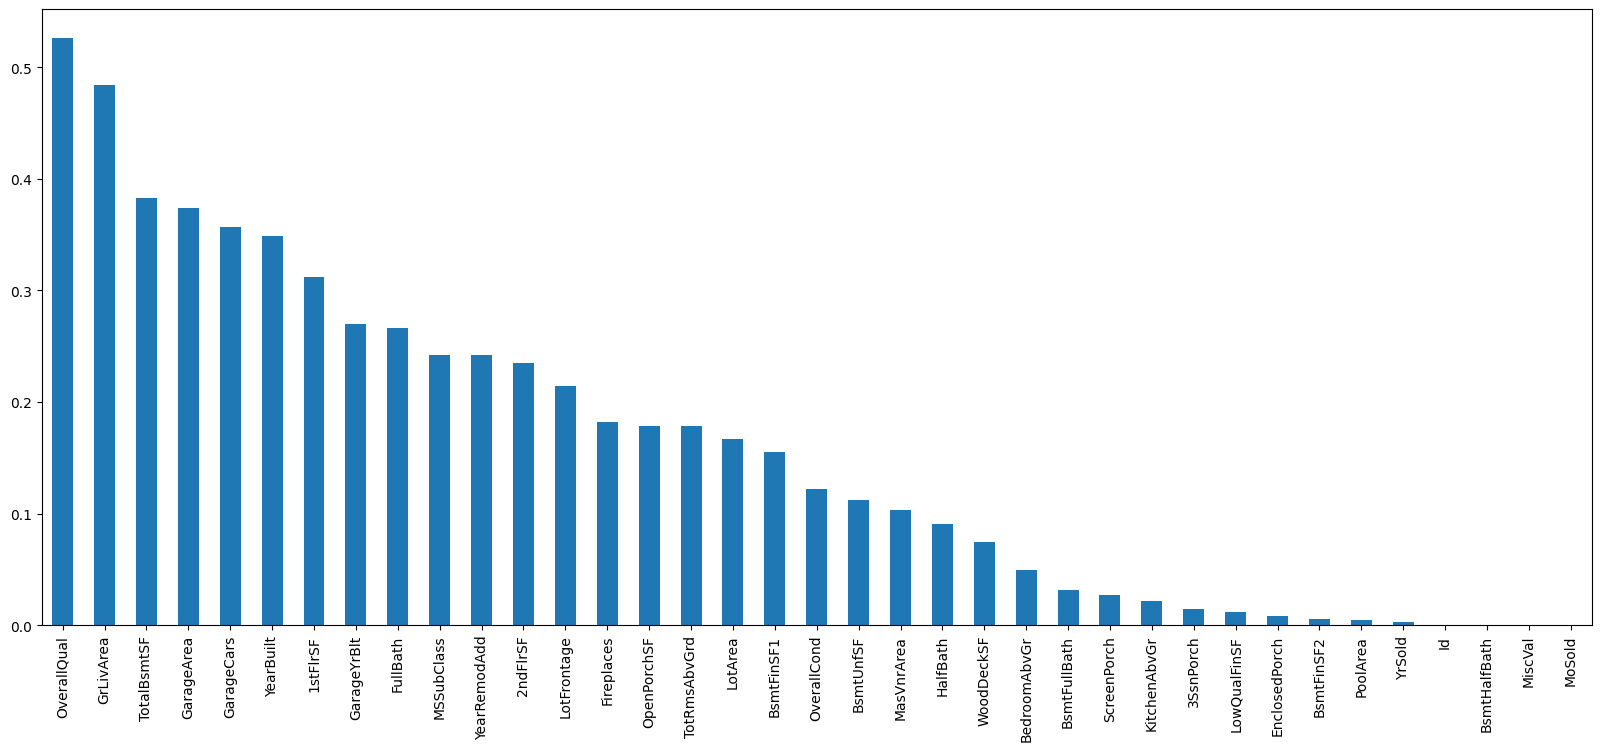

In [16]:
mir.sort_values(ascending = False).plot.bar(figsize = (20,8))

### We will consider top 5 or 10 / 5%tile or 10%tile features as we have many features

In [19]:
sel_top = SelectPercentile(mutual_info_regression, percentile=20)
sel_top.fit(X_train.fillna(0), y_train)
X_train.columns[sel_top.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')